In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from datetime import datetime

from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

import gmaps

# Import the API key.
from config import g_key

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8


In [3]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [7]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [8]:
city_weather.status_code

200

In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":800,"main":"Clear","description":"clear sky","icon":"01n"}],"base":"stations","main":{"temp":67.96,"feels_like":62.64,"temp_min":64,"temp_max":71.01,"pressure":1023,"humidity":60},"wind":{"speed":11.41,"deg":180},"clouds":{"all":9},"dt":1592444436,"sys":{"type":1,"id":4967,"country":"US","sunrise":1592384819,"sunset":1592439816},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [11]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 67.96,
  'feels_like': 62.64,
  'temp_min': 64,
  'temp_max': 71.01,
  'pressure': 1023,
  'humidity': 60},
 'wind': {'speed': 11.41, 'deg': 180},
 'clouds': {'all': 9},
 'dt': 1592444436,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=905b32babdb8b30c96f3b85b5e463ca8&q=Boston


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 67.96,
  'feels_like': 62.64,
  'temp_min': 64,
  'temp_max': 71.01,
  'pressure': 1023,
  'humidity': 60},
 'wind': {'speed': 11.41, 'deg': 180},
 'clouds': {'all': 9},
 'dt': 1592444436,
 'sys': {'type': 1,
  'id': 4967,
  'country': 'US',
  'sunrise': 1592384819,
  'sunset': 1592439816},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [16]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["sys"]

{'type': 1,
 'id': 4967,
 'country': 'US',
 'sunrise': 1592384819,
 'sunset': 1592439816}

In [17]:
boston_data["sys"]["country"]

'US'

In [18]:
boston_data["dt"]

1592444436

In [19]:
boston_data["coord"]["lat"]

42.36

In [20]:
boston_data["main"]["temp_max"]

71.01

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 71.01 60 9 11.41


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 6, 18, 1, 40, 36)

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | saldanha
Processing Record 4 of Set 1 | hasaki
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | palu
Processing Record 10 of Set 1 | scottsburgh
City not found. Skipping...
Processing Record 11 of Set 1 | meulaboh
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | laguna
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | new norfolk
Processing Record 16 of Set 1 | camaguey
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1

Processing Record 38 of Set 4 | puerto pinasco
City not found. Skipping...
Processing Record 39 of Set 4 | abha
Processing Record 40 of Set 4 | olafsvik
Processing Record 41 of Set 4 | bilma
Processing Record 42 of Set 4 | lavrentiya
Processing Record 43 of Set 4 | gorontalo
Processing Record 44 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 45 of Set 4 | saint anthony
Processing Record 46 of Set 4 | svetlyy
Processing Record 47 of Set 4 | zarate
Processing Record 48 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | bethanien
Processing Record 1 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 2 of Set 5 | richmond
Processing Record 3 of Set 5 | pangnirtung
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | debre tabor
Processing Record 6 of Set 5 | fuling
Processing Record 7 of Set 5 | fort nelson
Processing Record 8 of Set 5 | loa janan
Processing

Processing Record 31 of Set 8 | bogovarovo
Processing Record 32 of Set 8 | smithers
Processing Record 33 of Set 8 | egvekinot
Processing Record 34 of Set 8 | vostok
Processing Record 35 of Set 8 | zyryanka
Processing Record 36 of Set 8 | gayny
Processing Record 37 of Set 8 | sur
Processing Record 38 of Set 8 | upata
Processing Record 39 of Set 8 | fochville
Processing Record 40 of Set 8 | kaeo
Processing Record 41 of Set 8 | geraldton
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | panubigan
Processing Record 44 of Set 8 | hassan
Processing Record 45 of Set 8 | taksimo
Processing Record 46 of Set 8 | muisne
Processing Record 47 of Set 8 | san cristobal
Processing Record 48 of Set 8 | guider
Processing Record 49 of Set 8 | tiznit
Processing Record 50 of Set 8 | guerrero negro
Processing Record 1 of Set 9 | muroto
Processing Record 2 of Set 9 | mokolo
Processing Record 3 of Set 9 | kosh-agach
Processing Record 4 of Set 9 | vao
Processing Record 5 of Set 9 | m

Processing Record 22 of Set 12 | salekhard
Processing Record 23 of Set 12 | qitaihe
Processing Record 24 of Set 12 | ermua
Processing Record 25 of Set 12 | casablanca
Processing Record 26 of Set 12 | dimbokro
Processing Record 27 of Set 12 | kovur
Processing Record 28 of Set 12 | tiksi
Processing Record 29 of Set 12 | tawkar
City not found. Skipping...
Processing Record 30 of Set 12 | san policarpo
Processing Record 31 of Set 12 | san lorenzo
Processing Record 32 of Set 12 | marakkanam
Processing Record 33 of Set 12 | huarmey
Processing Record 34 of Set 12 | severomorsk
Processing Record 35 of Set 12 | birao
Processing Record 36 of Set 12 | krasnoselkup
Processing Record 37 of Set 12 | catamarca
Processing Record 38 of Set 12 | chapais
Processing Record 39 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 40 of Set 12 | ucluelet
Processing Record 41 of Set 12 | knysna
Processing Record 42 of Set 12 | karaul
City not found. Skipping...
Processing Record 43 of Set 12 | ta

In [25]:
len(city_data)

571

In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,48.99,83,0,1.01,ZA,2020-06-18 01:44:57
1,San Patricio,19.22,-104.70,80.60,78,40,11.41,MX,2020-06-18 01:44:57
2,Saldanha,-33.01,17.94,46.40,70,0,3.36,ZA,2020-06-18 01:44:58
3,Hasaki,35.73,140.83,75.99,78,75,3.36,JP,2020-06-18 01:42:09
4,Rikitea,-23.12,-134.97,75.61,81,100,16.35,PF,2020-06-18 01:41:51
5,Arraial Do Cabo,-22.97,-42.03,64.40,93,40,4.70,BR,2020-06-18 01:44:58
6,Vaini,-21.20,-175.20,75.20,73,40,12.75,TO,2020-06-18 01:44:58
7,Palu,-0.89,119.87,87.03,61,100,1.30,ID,2020-06-18 01:44:59
8,Meulaboh,4.14,96.13,82.80,65,90,2.66,ID,2020-06-18 01:44:59
9,Thompson,55.74,-97.86,41.00,93,90,18.34,CA,2020-06-18 01:44:59


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_data_df = city_data_df[new_column_order]
new_city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2020-06-18 01:44:57,-34.42,19.23,48.99,83,0,1.01
1,San Patricio,MX,2020-06-18 01:44:57,19.22,-104.70,80.60,78,40,11.41
2,Saldanha,ZA,2020-06-18 01:44:58,-33.01,17.94,46.40,70,0,3.36
3,Hasaki,JP,2020-06-18 01:42:09,35.73,140.83,75.99,78,75,3.36
4,Rikitea,PF,2020-06-18 01:41:51,-23.12,-134.97,75.61,81,100,16.35
5,Arraial Do Cabo,BR,2020-06-18 01:44:58,-22.97,-42.03,64.40,93,40,4.70
6,Vaini,TO,2020-06-18 01:44:58,-21.20,-175.20,75.20,73,40,12.75
7,Palu,ID,2020-06-18 01:44:59,-0.89,119.87,87.03,61,100,1.30
8,Meulaboh,ID,2020-06-18 01:44:59,4.14,96.13,82.80,65,90,2.66
9,Thompson,CA,2020-06-18 01:44:59,55.74,-97.86,41.00,93,90,18.34


In [28]:
new_city_data_df.count()

City          571
Country       571
Date          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
dtype: int64

In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
new_city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = new_city_data_df["Lat"]
max_temps = new_city_data_df["Max Temp"]
humidity = new_city_data_df["Humidity"]
cloudiness = new_city_data_df["Cloudiness"]
wind_speed = new_city_data_df["Wind Speed"]

In [31]:
# Import the time module.
import time

In [32]:
# # Get today's date in seconds.
# today = time.time()
# today

In [33]:
# today = time.strftime("%x")
# today

In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

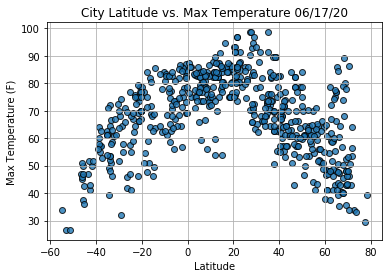

In [35]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

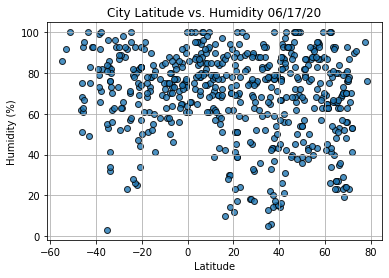

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

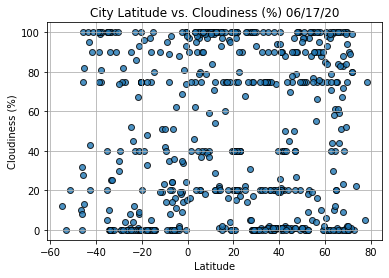

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

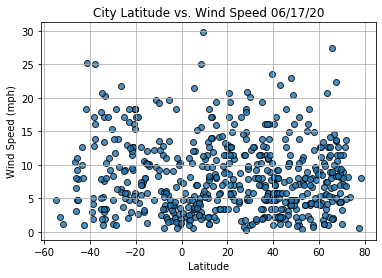

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [41]:
northern_hemi_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,San Patricio,19.22,-104.70,80.60,78,40,11.41,MX,2020-06-18 01:44:57
3,Hasaki,35.73,140.83,75.99,78,75,3.36,JP,2020-06-18 01:42:09
8,Meulaboh,4.14,96.13,82.80,65,90,2.66,ID,2020-06-18 01:44:59
9,Thompson,55.74,-97.86,41.00,93,90,18.34,CA,2020-06-18 01:44:59
10,Laguna,38.42,-121.42,89.60,15,1,13.87,US,2020-06-18 01:44:59
...,...,...,...,...,...,...,...,...,...
562,Santa Rosa,14.31,121.11,91.00,55,20,2.24,PH,2020-06-18 01:46:47
565,Sillod,20.30,75.65,75.20,88,40,3.36,IN,2020-06-18 01:46:47
566,Kaseda,31.42,130.32,78.80,88,75,12.75,JP,2020-06-18 01:46:48
568,Salalah,17.02,54.09,84.20,89,75,3.36,OM,2020-06-18 01:46:48


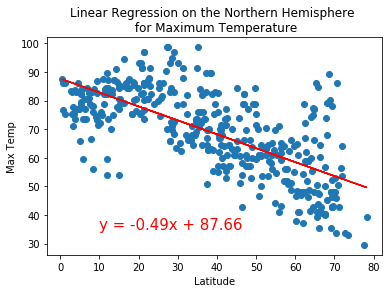

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,35))

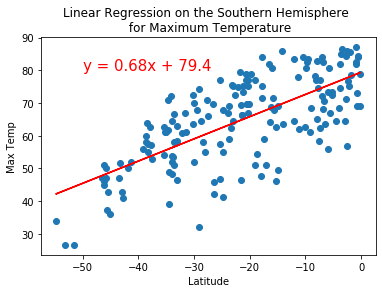

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", "Max Temp",(-50,80))

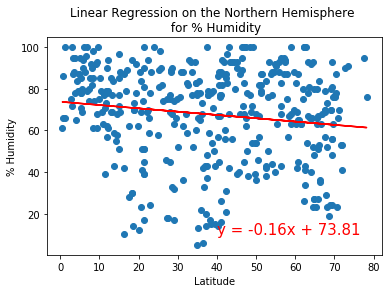

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity', (40, 10))

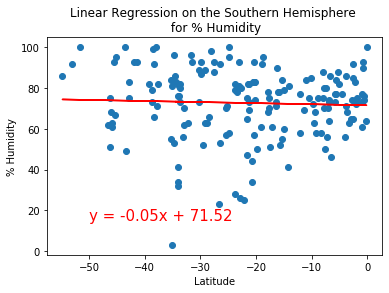

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

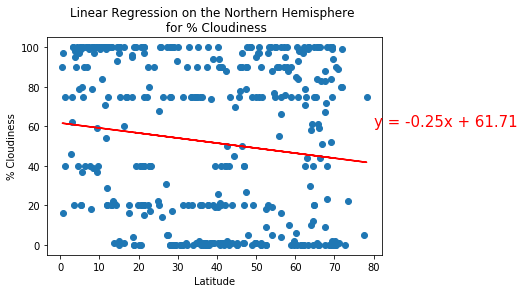

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(80,60))

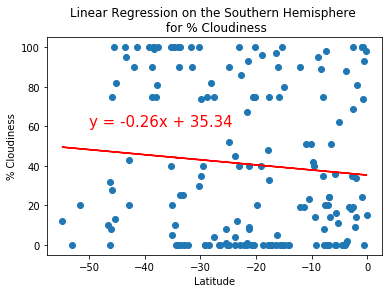

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

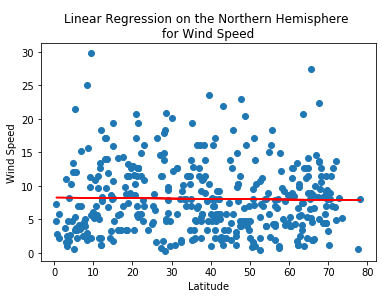

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

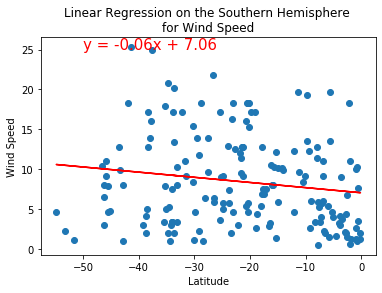

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,25))

In [50]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [51]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Changing max_temp to temps

In [52]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable. Changing weights from max_temp to temps
heat_layer = gmaps.heatmap_layer(locations, weights=temps)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

# Changing heat layer

In [53]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))
# Assign the figure variable.
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
# Assign the heatmap variable. Changing weights from max_temp to temps
heat_layer = gmaps.heatmap_layer(locations, weights=temps, dissipating=False, max_intensity=300, point_radius=4)
# Add the heatmap layer.
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [54]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [55]:
# Heatmap of percent cloudiness
locations = city_data_df[["Lat", "Lng"]]
clouds = city_data_df["Cloudiness"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=clouds, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [56]:
# Heatmap of percent wind speed
locations = city_data_df[["Lat", "Lng"]]
wind = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [58]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) &\
                                      (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,San Patricio,19.22,-104.70,80.60,78,40,11.41,MX,2020-06-18 01:44:57
3,Hasaki,35.73,140.83,75.99,78,75,3.36,JP,2020-06-18 01:42:09
4,Rikitea,-23.12,-134.97,75.61,81,100,16.35,PF,2020-06-18 01:41:51
6,Vaini,-21.20,-175.20,75.20,73,40,12.75,TO,2020-06-18 01:44:58
7,Palu,-0.89,119.87,87.03,61,100,1.30,ID,2020-06-18 01:44:59
8,Meulaboh,4.14,96.13,82.80,65,90,2.66,ID,2020-06-18 01:44:59
10,Laguna,38.42,-121.42,89.60,15,1,13.87,US,2020-06-18 01:44:59
15,Butaritari,3.07,172.79,82.94,72,62,11.05,KI,2020-06-18 01:45:00
16,Hithadhoo,-0.60,73.08,84.11,74,0,7.61,MV,2020-06-18 01:41:55
21,Saint George,37.10,-113.58,89.60,14,1,12.75,US,2020-06-18 01:43:18


In [59]:
# determine if the DataFrame has any null values for any of the rows
preferred_cities_df.isnull().sum()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [60]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,San Patricio,MX,80.60,19.22,-104.70,
3,Hasaki,JP,75.99,35.73,140.83,
4,Rikitea,PF,75.61,-23.12,-134.97,
6,Vaini,TO,75.20,-21.20,-175.20,
7,Palu,ID,87.03,-0.89,119.87,
8,Meulaboh,ID,82.80,4.14,96.13,
10,Laguna,US,89.60,38.42,-121.42,
15,Butaritari,KI,82.94,3.07,172.79,
16,Hithadhoo,MV,84.11,-0.60,73.08,
21,Saint George,US,89.60,37.10,-113.58,


In [61]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]
    
    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"
    
    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [62]:
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,San Patricio,MX,80.60,19.22,-104.70,Hotel Cabo Blanco
3,Hasaki,JP,75.99,35.73,140.83,Inubosaki Kanko Hotel
4,Rikitea,PF,75.61,-23.12,-134.97,Pension Maro'i
6,Vaini,TO,75.20,-21.20,-175.20,Keleti Beach Resort
7,Palu,ID,87.03,-0.89,119.87,Hotel Santika Palu
...,...,...,...,...,...,...
560,Conceicao Do Araguaia,BR,78.37,-8.26,-49.26,Tarumã Tropical Hotel
564,Poum,NC,75.13,-20.23,164.02,Gîte kajeon
565,Sillod,IN,75.20,20.30,75.65,पवन
566,Kaseda,JP,78.80,31.42,130.32,Sun Stay Kaseda


In [63]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
                                max_intensity=300, point_radius=4)
fig.add_layer(heat_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [64]:
# Add a heatmap of temperature for the vacation spots. Adding marker_layer
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0,31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
                                max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))